# Attempting to make a wind graph signal

Source of the weather lat-long data: https://home.openweathermap.org/

Source of the UK Towns lat-long: https://www.latlong.net/category/towns-235-55.html

key = "af636004ff30873fb62b2acae98683ba"

In [1]:
# If gspx is not installed, we add it to the path
import os, sys
import pandas as pd

gdir = os.path.dirname(os.getcwd())  # parent folder
sys.path.insert(0, gdir)
path = gdir + "/resources/uk_towns.tsv"

towns = pd.read_csv(path, sep="\t")
towns

,TOWN,LATITUDE,LONGITUDE
0,"Troon, Scotland, the UK",55.540001,-4.660000
1,"St.Asaph, Wales, the UK",53.257999,-3.442000
2,"Stirling, Scotland, UK",56.116600,-3.936900
3,"Welling, Bexley, London, the UK",51.456600,0.105600
4,"Bonnybridge, Scotland, UK",56.003227,-3.888634
...,...,...,...
172,"Newport, Telford and Wrekin, UK",52.768555,-2.375587
173,"Dover, Kent, UK",51.126369,1.316198
174,"Limavady, UK",55.051434,-6.950054
175,"Litcham, Norfolk, UK",52.724182,0.791488


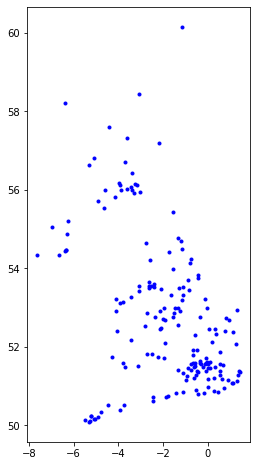

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 8))
plt.plot(towns['LONGITUDE'], towns['LATITUDE'], 'b.')
plt.show()

In [7]:
from tqdm import tqdm
import requests
import time


speed = list()
deg = list()
key = "af636004ff30873fb62b2acae98683ba"

for idx, row in tqdm(towns.iterrows(), total=len(towns)):
    lat = row['LATITUDE']
    lon = row['LONGITUDE']
    response = requests.get(
        f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&"
        f"lon={lon}&appid={key}")
    res = eval(response.content.decode('utf-8'))
    speed.append(res['wind']['speed'])
    deg.append(res['wind']['deg'])
    if idx % 10 == 0:
        time.sleep(5)

towns['WIND_SPEED'] = speed
towns['WIND_DEGREES'] = deg

100%|██████████| 177/177 [06:45<00:00,  2.29s/it]


Data das requisições: aprox. **Sat, 16 Apr 2022 19:00 GMT**

In [8]:
towns

,TOWN,LATITUDE,LONGITUDE,WIND_SPEED,WIND_DEGREES
0,"Troon, Scotland, the UK",55.540001,-4.660000,3.09,210
1,"St.Asaph, Wales, the UK",53.257999,-3.442000,1.33,116
2,"Stirling, Scotland, UK",56.116600,-3.936900,1.96,202
3,"Welling, Bexley, London, the UK",51.456600,0.105600,6.17,90
4,"Bonnybridge, Scotland, UK",56.003227,-3.888634,1.96,196
...,...,...,...,...,...
172,"Newport, Telford and Wrekin, UK",52.768555,-2.375587,3.57,158
173,"Dover, Kent, UK",51.126369,1.316198,5.19,63
174,"Limavady, UK",55.051434,-6.950054,4.94,164
175,"Litcham, Norfolk, UK",52.724182,0.791488,3.61,128


In [12]:
towns.to_csv("/Users/gboaviagem/gspx/resources/uk_towns_wind.tsv", sep="\t")